In [1]:
#Einfache Regression von zwei Features (also in zwei Dimensionen durch). 
#Tatsächlich ist man aber in der Anzahl an Features nicht eingeschränkt. Ziel ist es ein Regression-Model 
#zu erstellen, in dem man einen numerischen Eingabe-Wert (x) eingibt und einen numerischen Ausgabe-Wert (y) erhält.

#Wir erzeugen und ein künstlichen Datenset von 500 Datenpunkten mit Hilfe der Funktion make_regression. 
#Mit dem Parameter noise können wir angeben, wie verauscht die Daten sein sollen:
from sklearn.datasets import make_regression
X_reg, y_reg = make_regression(n_samples=500, n_features=1, noise=20, random_state=1)


In [2]:
#Blick auf Daten
X_reg


array([[-1.91835552e-01],
       [-5.37223024e-01],
       [ 5.64382855e-01],
       [ 1.93752881e+00],
       [ 1.20205486e+00],
       [-2.43483776e+00],
       [ 2.10025514e+00],
       [ 1.00088142e+00],
       [-7.67309826e-01],
       [-7.77858827e-01],
       [-1.09991490e-01],
       [-4.48738033e-01],
       [ 6.74570707e-01],
       [ 1.74481176e+00],
       [-2.26314243e-01],
       [ 1.62765075e+00],
       [ 3.69492716e-01],
       [ 8.25029824e-01],
       [ 8.65407629e-01],
       [ 3.67231814e-01],
       [ 7.78211279e-02],
       [ 1.04444209e+00],
       [ 8.52704062e-01],
       [ 5.82815214e-01],
       [-6.70662286e-01],
       [ 5.92472801e-01],
       [ 4.41364444e-01],
       [-2.46169559e-02],
       [ 1.38877940e+00],
       [ 4.77610182e-01],
       [ 1.61694960e+00],
       [-7.00398505e-01],
       [ 1.62284909e+00],
       [ 1.04008915e+00],
       [ 3.86539145e-01],
       [ 2.19069973e+00],
       [ 2.11124755e-01],
       [ 8.38983414e-01],
       [-3.5

In [3]:
#Und Dimension
X_reg.shape


(500, 1)

In [4]:
#Länge des Ziel-Vektors
y_reg.shape


(500,)

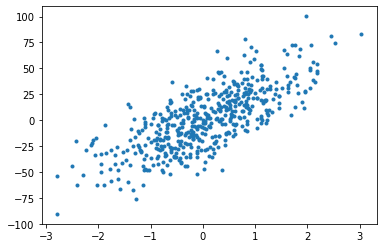

In [5]:
#Daten zweidimensional plotten. Die x-Achse stellt die Eingangswerte dar, die y-Achse die davon abhängigen Werte. 
#Mit X_reg[:, 0] wird die erste und einzige Spalte, der prinzipiel n-dimensionalen Input-Werte-Matrix genutzt.
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_reg[:, 0], y_reg, ".")


In [6]:
# Für diese Daten eine lineares Regression-Modell erstellen.
#Laden dafür die nötige Klasse und erstellen eine Instanz davon. 
#Noch einmal zur Erinnerung - ein lineare Modell wir durch folgende Formel beschrieben:
#y = w_1 * x_1 + w_2 * x_2 + … + w_n * x_n + b
#Beim Fitten werden die w-Parameter und der b-Parameter mit Werten versehen.
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()


In [7]:
#Daten werden für eine spätere Bewertung der Güte in ein Trainings- und ein Testset aufgeteilt.
from sklearn.model_selection import train_test_split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg)


In [8]:
#Fitting der Parameter erfolg mit der Methode fit.
linear_regression.fit(X_reg_train, y_reg_train)


LinearRegression()

In [9]:
#Anschauen des Koeffizienten also in diesem nut Fall w_1. Die Gerade hat also die Steigung 21.4.
linear_regression.coef_


array([22.85895964])

In [11]:
#y-Achsen-Abschnit bei 0 (Intercept).
linear_regression.intercept_


0.12642152779875604

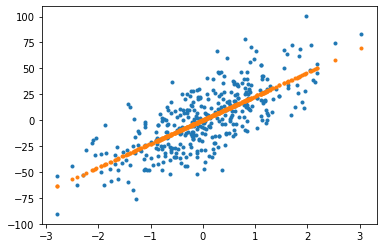

In [12]:
#Trainingsdaten und die Gerade, die das lineare Modell repräsentiert, werden in einem Plot dargestellt.
plt.plot(X_reg_train, y_reg_train, ".")
y_lm_predicted = linear_regression.predict(X_reg_train)
plt.plot(X_reg_train, y_lm_predicted, ".")


In [13]:
#Trainierte Modell kann nun auf neue Werte angewandt werden. Zum Beipiel unserer Test-Datenset:
linear_regression.predict(X_reg_test)


array([-31.92936381,  44.81290054,  47.09299096,  16.46576809,
         5.81371152,   0.93471656,  25.68578771,  56.11644061,
        -6.44113733,  32.12539771, -12.34940815,  25.76086366,
       -19.19410012, -40.01221181,   1.34730797,  23.00552959,
        11.62870287,  37.22306328,  -6.6544866 ,  10.14244837,
        10.44989231,  38.0677725 ,  -5.31268358,  -7.75962718,
        10.44230464,  11.61291934, -12.05786859,  41.03835159,
        16.62399082,   5.67359249, -10.00402775, -44.29592976,
        37.08820714, -21.2642942 ,  -3.86711095, -26.39386007,
       -25.99035584,  23.75542792,   9.80706187, -20.86816224,
        25.60005701,  21.15707433, -15.68422368,  15.54640609,
         7.52192025,  27.53243695,  40.01100322,  47.13256943,
       -10.13126305,  10.45743775, -22.66441373, -18.85044432,
        -2.38786951, -35.97144826, -14.66142094,  25.99429202,
         0.50422452,  33.30458441,  11.0440934 ,  17.89741576,
         7.21892323, -23.75180499,   2.91112904,  40.36

In [14]:
#Für das Testdatenset kennen wir die tatsächlichen y-Werte und können mit der Methode score eine Voraussage durchführen 
#und diese mit den Werten vergleichen um die Güte der Voraussage zu bewerten.
linear_regression.score(X_reg_test, y_reg_test)


0.6051011101232313

In [15]:
#Gleiche Vorgehensweise können wir nun mit anderen Regression-Methoden nutzen. Zum Beispiel mit der SVM-Methode
from sklearn.svm import SVR
svm_regression = SVR()
svm_regression.fit(X_reg_train, y_reg_train)
svm_regression.score(X_reg_test, y_reg_test)


0.48922249724291156